In [408]:
import re
import numpy as np
import pandas as pd
def yearmonth(x):
    p = re.compile('.{7}')
    return p.findall(x)[0]

pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(precision=6, suppress=True)

# 데이터 불러오기

## 각 데이터 불러오기

In [409]:
data20 = pd.read_csv('2020년_증식데이터_편집.csv', index_col=0)
data20['수주월'] = data20['수주일자'].apply(yearmonth)
data21 = pd.read_csv('2021년_증식데이터_편집.csv', index_col=0)
data21['수주월'] = data21['수주일자'].apply(yearmonth)

# 20년도 21년도 데이터 이어붙이기

data20_21 = pd.concat((data20,data21))
data20_21 = data20_21.sort_values(['수주일자','거래처코드','제품명'])

In [410]:
weather = pd.read_csv('전국평균날씨데이터.csv', index_col=0)
construction = pd.read_csv('연면적별.csv', index_col=0)
rate = pd.read_csv('월별 시장금리추이(202001_202112).csv',encoding='cp949',index_col=0).transpose().reset_index()
shipment = pd.read_csv('시멘트2년 국내출하(월별증감율).csv')

## 빈 날짜 DF 생성

In [411]:
# 빈 날짜 데이터프레임 생성
start = pd.to_datetime('2020-01-01')
end = pd.to_datetime('2021-12-31')
date_all = pd.date_range(start=start,end=end,freq='d')
# test = pd.DataFrame(index=date_all).join(data20_21_detail)
# test[test['거래처코드'].isnull()]

In [412]:
date_all = pd.date_range(start, end, freq='d').to_frame().rename(columns={0:'Date'}).reset_index(drop=True).set_index('Date')
date_all

""
Date
2020-01-01
2020-01-02
2020-01-03
2020-01-04
2020-01-05
...
2021-12-27
2021-12-28
2021-12-29


In [413]:
# 빈 날짜 데이터프레임 생성
start = pd.to_datetime('2020-01-01')
end = pd.to_datetime('2021-12-31')
date_m = pd.date_range(start=start,end=end,freq='m')

In [414]:
date_m = pd.DataFrame(date_m, columns=['Date'])
date_m

,Date
0,2020-01-31
1,2020-02-29
2,2020-03-31
3,2020-04-30
4,2020-05-31
5,2020-06-30
6,2020-07-31
7,2020-08-31
8,2020-09-30
9,2020-10-31


In [415]:
date_m['Date'] = date_m['Date'].astype('str').apply(yearmonth)
date_m

,Date
0,2020-01
1,2020-02
2,2020-03
3,2020-04
4,2020-05
5,2020-06
6,2020-07
7,2020-08
8,2020-09
9,2020-10


In [416]:
start = pd.to_datetime('2022-01-04')
end = pd.to_datetime('2022-3-22')
pred_date_all = pd.date_range(start=start,end=end,freq='d')
pred_date_all = pd.date_range(start, end, freq='D').to_frame().rename(columns={0:'Date'}).reset_index(drop=True).set_index('Date')
pred_date_all

""
Date
2022-01-04
2022-01-05
2022-01-06
2022-01-07
2022-01-08
...
2022-03-18
2022-03-19
2022-03-20


In [417]:
pred_date_all = pd.date_range(start, end, freq='D').to_frame().rename(columns={0:'Date'}).reset_index(drop=True).set_index('Date')
pred_date_all

""
Date
2022-01-04
2022-01-05
2022-01-06
2022-01-07
2022-01-08
...
2022-03-18
2022-03-19
2022-03-20


## 수주량

### 주 단위 수주량 합계 : 전체

In [418]:
# 주 단위 수주량 합계 데이터셋
data20_21_total_week = data20_21.copy()
data20_21_total_week = data20_21_total_week.pivot_table('수주량',index=['수주일자'],aggfunc='sum')
data20_21_total_week = data20_21_total_week.reset_index()
data20_21_total_week['수주일자'] = pd.to_datetime(data20_21_total_week['수주일자'])
data20_21_total_week = data20_21_total_week.set_index('수주일자')

data20_21_total_week = data20_21_total_week.resample('w-tue').sum()
data20_21_total_week

,수주량
수주일자,
2020-01-07,1158600
2020-01-14,757000
2020-01-21,1464000
2020-01-28,1016800
2020-02-04,1392050
...,...
2021-12-07,1625070
2021-12-14,861000
2021-12-21,1405540


### 주 단위 수주량 합계 : 품목별

In [419]:
# 주 단위 (품목별) 수주량 합계 데이터셋

data20_21_detail_week = data20_21.copy()
data20_21_detail_week = data20_21_detail_week.pivot_table('수주량',index=['수주일자','제품명'], aggfunc='sum')
data20_21_detail_week = data20_21_detail_week.reset_index()
data20_21_detail_week['수주일자'] = pd.to_datetime(data20_21_detail_week['수주일자'])
data20_21_detail_week = data20_21_detail_week.set_index('수주일자')


In [420]:
data20_21_detail_week

,제품명,수주량
수주일자,,
2020-01-01,PEMA-HR1000,40000
2020-01-01,PEMA-PR1000,20000
2020-01-01,PEMA-SR2000,18000
2020-01-01,PEMA-SR3000F,9000
2020-01-02,CSA4000,5000
...,...,...
2021-12-31,PEMA-PCM2000,5000
2021-12-31,PEMA-PCM2000B,5000
2021-12-31,PEMA-PR1000,66000


In [421]:
li = []
for j in data20_21_detail_week['제품명'].unique():
    data = data20_21_detail_week[data20_21_detail_week['제품명']==j]
    data = date_all.join(data,how='outer')
    data = data.drop(['제품명'],axis=1).resample('w-tue').sum()
    data['제품명'] = j
    data = data[['제품명','수주량']]
    li.append(data)

In [422]:
data20_21_detail_week = pd.concat(li)
data20_21_detail_week

,제품명,수주량
2020-01-07,PEMA-HR1000,338000.00
2020-01-14,PEMA-HR1000,297000.00
2020-01-21,PEMA-HR1000,567000.00
2020-01-28,PEMA-HR1000,278000.00
2020-02-04,PEMA-HR1000,559050.00
...,...,...
2021-12-07,PEMA-HR1000S,0.00
2021-12-14,PEMA-HR1000S,10000.00
2021-12-21,PEMA-HR1000S,0.00
2021-12-28,PEMA-HR1000S,10000.00


## 예측중량

### 방법1) 30% 오차 예측

In [423]:
data20_21_detail_week['예상중량'] = 0

for i in range(len(data20_21_detail_week)):
    if data20_21_detail_week['수주량'][i] == 0:
        pass
    else:
        data20_21_detail_week['예상중량'][i] = np.random.randint(data20_21_detail_week['수주량'][i]*0.7, data20_21_detail_week['수주량'][i]*1.3, 1)

In [424]:
data20_21_detail_week.head(50)

,제품명,수주량,예상중량
2020-01-07,PEMA-HR1000,338000.00,342341
2020-01-14,PEMA-HR1000,297000.00,252952
2020-01-21,PEMA-HR1000,567000.00,555156
2020-01-28,PEMA-HR1000,278000.00,310633
2020-02-04,PEMA-HR1000,559050.00,507763
2020-02-11,PEMA-HR1000,781500.00,925785
2020-02-18,PEMA-HR1000,378000.00,445773
2020-02-25,PEMA-HR1000,617000.00,591184
2020-03-03,PEMA-HR1000,364000.00,278307
2020-03-10,PEMA-HR1000,617000.00,435166


### 방법2) 아리마 예측 (사용x)

In [78]:
len(data20_21_total_week.iloc[:26,:])

26

In [37]:
a = data20_21_total_week.iloc[:26,:]

In [29]:
from pmdarima import auto_arima

auto_arima_model = auto_arima(a, start_p=1,start_q=1,
                             max_p=3, max_q=3,m=4,
                             start_P = 1, start_Q = 1, max_P=3, max_Q=3,
                             seasonal = True, d=1, D=1, trace=True,
                             error_action = 'ignore',
                             suppress_warning=True, stepwise=False)
auto_arima_model.summary()

NameError: name 'a' is not defined

In [344]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings;warnings.filterwarnings('ignore')

# 1개월(4주) 예측

li = []
for i in range(79):

    a = data20_21_total_week.iloc[i:i+26,:]

    weight = SARIMAX(a.수주량, order=(2,1,1), seasonal_order=(1,1,0,4))
    result = weight.fit()
    pred_weight = result.predict(start=len(a),end=(len(a)),
                             typ = 'level').rename('Forecast')
    li.append(pred_weight[0])

In [345]:
pred_weight = pd.DataFrame(li,columns=['예측중량']).set_index(data20_21_total_week.index[26:])
pred_weight

,예측중량
수주일자,
2020-07-07,1170712.13
2020-07-14,1319201.38
2020-07-21,1338214.41
2020-07-28,1469693.97
2020-08-04,1282272.39
...,...
2021-12-07,1251255.59
2021-12-14,1766682.93
2021-12-21,2250126.45


In [346]:
# 수주량과 비교해보자
data20_21_total_week.iloc[26:]

,수주량
수주일자,
2020-07-07,1218000
2020-07-14,1396000
2020-07-21,1544800
2020-07-28,1578550
2020-08-04,1827500
...,...
2021-12-07,1625070
2021-12-14,861000
2021-12-21,1405540


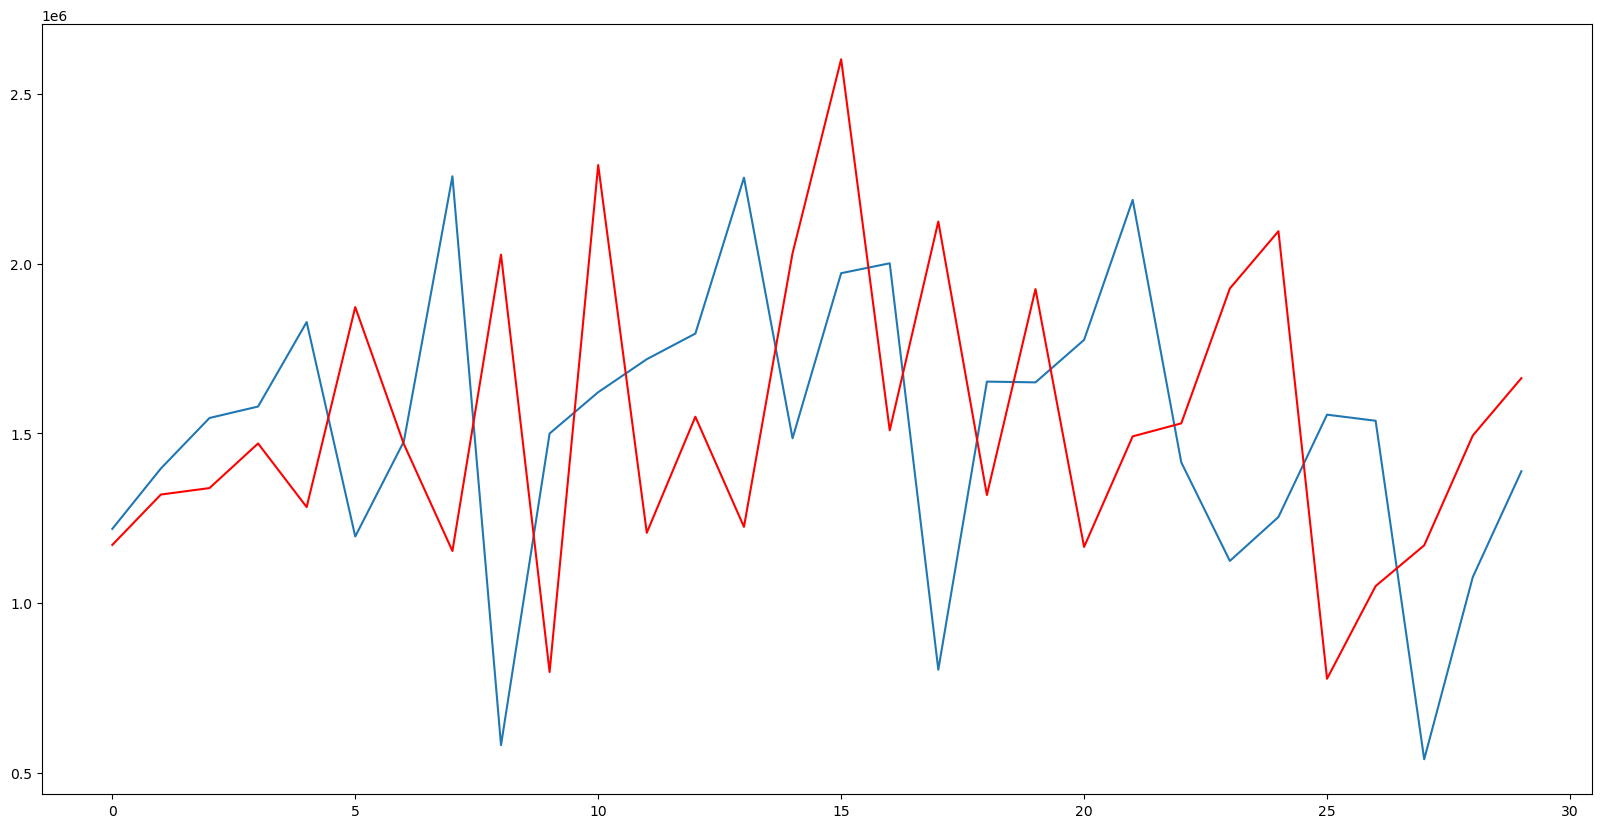

In [349]:
import matplotlib.pyplot as plt

x = range(len(data20_21_total_week.iloc[26:56]))
y = data20_21_total_week.iloc[26:56]

plt.figure(figsize=(20,10))
plt.plot(x,y)
plt.plot(x,pred_weight[0:30],'r')

## 출하량

In [425]:
shipment_week = shipment.copy()
shipment_week = pd.concat([shipment_week,date_m],axis=1).set_index('Date').drop(['월','월별','월별증감율'],axis=1)

In [426]:
shipment_week = shipment_week.reset_index()
shipment_week['Date'] = pd.to_datetime(shipment_week['Date'])
shipment_week = shipment_week.set_index('Date')
shipment_week = date_all.join(shipment_week).fillna(method='ffill')
shipment_week

,내수계
Date,
2020-01-01,2704.00
2020-01-02,2704.00
2020-01-03,2704.00
2020-01-04,2704.00
2020-01-05,2704.00
...,...
2021-12-27,4710.00
2021-12-28,4710.00
2021-12-29,4710.00


In [427]:
def strftime(x):
    return x.strftime('%Y-%m')

In [428]:
shipment_week = shipment_week.reset_index()
shipment_week['month'] = shipment_week['Date'].apply(strftime)

In [429]:
li = []
for i in shipment_week['month'].unique():
    li.extend((shipment_week[shipment_week['month']==i].loc[:,'내수계']/len(shipment_week[shipment_week['month']==i])).values)

In [430]:
shipment_week['내수계'] = pd.Series(li)

In [431]:
shipment_week = shipment_week.set_index('Date').drop('month',axis=1).resample('w-tue').sum()

In [432]:
shipment_week.columns = ['출하량']

In [433]:
shipment_week

,출하량
Date,
2020-01-07,610.58
2020-01-14,610.58
2020-01-21,610.58
2020-01-28,610.58
2020-02-04,692.99
...,...
2021-12-07,1063.55
2021-12-14,1063.55
2021-12-21,1063.55


## 날씨

In [434]:
# 주 단위 날씨 데이터셋
weather_week = weather.copy()
weather_week['날짜'] = pd.to_datetime(weather_week['날짜'])
weather_week = weather_week.set_index('날짜')
weather_week = weather_week.resample('w-tue').mean()
weather_week

,평균온도,일강수량,상대습도,최심적설
날짜,,,,
2020-01-07,2.75,7.03,72.22,0.02
2020-01-14,1.85,0.73,65.51,0.02
2020-01-21,1.09,0.13,58.34,0.03
2020-01-28,5.32,3.92,75.36,0.00
2020-02-04,2.95,0.30,67.21,0.01
...,...,...,...,...
2021-12-07,3.70,0.23,64.27,0.00
2021-12-14,4.86,0.10,69.05,0.00
2021-12-21,3.08,0.51,66.75,0.19


## 착공면적

In [435]:
from sklearn.preprocessing import MinMaxScaler

In [436]:
construction

,Month,연면적별
0,2020-01,6200509
1,2020-02,7743793
2,2020-03,11972937
3,2020-04,10481354
4,2020-05,10999316
5,2020-06,10255271
6,2020-07,10658885
7,2020-08,8595586
8,2020-09,10775873
9,2020-10,9195394


In [438]:
construction_week = construction.copy()
construction_week['Month'] = pd.to_datetime(construction_week['Month'])
construction_week = construction_week.set_index('Month')
construction_week = date_all.join(construction_week).fillna(method='ffill')
construction_week

,연면적별
Date,
2020-01-01,6200509.00
2020-01-02,6200509.00
2020-01-03,6200509.00
2020-01-04,6200509.00
2020-01-05,6200509.00
...,...
2021-12-27,14132721.00
2021-12-28,14132721.00
2021-12-29,14132721.00


In [439]:
def strftime(x):
    return x.strftime('%Y-%m')

In [440]:
construction_week = construction_week.reset_index()
construction_week['month'] = construction_week['Date'].apply(strftime)

In [441]:
li = []
for i in construction_week['month'].unique():
    li.extend((construction_week[construction_week['month']==i].loc[:,'연면적별']/len(construction_week[construction_week['month']==i])).values)

In [442]:
construction_week['연면적별'] = pd.Series(li)

In [443]:
construction_week = construction_week.set_index('Date').drop('month',axis=1).resample('w-tue').sum()


In [444]:
construction_week

,연면적별
Date,
2020-01-07,1400114.94
2020-01-14,1400114.94
2020-01-21,1400114.94
2020-01-28,1400114.94
2020-02-04,1668158.64
...,...
2021-12-07,3191259.58
2021-12-14,3191259.58
2021-12-21,3191259.58


In [445]:
scaler_ = MinMaxScaler()
scaler_.fit(construction_week)
construction_week_scaled_ = scaler_.transform(construction_week)

construction_week_scaled_ = pd.DataFrame(construction_week_scaled_, columns=['착공지수'])

In [446]:
construction_week_scaled_ = construction_week_scaled_.set_index(construction_week.index)

## 금리

In [447]:
start = pd.to_datetime('2020-01-01')
end = pd.to_datetime('2022-01-04')
date_gold = pd.date_range(start, end, freq='w-tue').to_frame().rename(columns={0:'Date'}).reset_index(drop=True).set_index('Date')
date_gold

""
Date
2020-01-07
2020-01-14
2020-01-21
2020-01-28
2020-02-04
...
2021-12-07
2021-12-14
2021-12-21


In [448]:
import numpy as np

In [449]:
rate_week = rate.copy().set_index('index')
rate_week = rate_week.reset_index()
rate_week['index'] = pd.to_datetime(rate_week['index'])
rate_week = rate_week.set_index('index')
rate_week = date_all.join(rate_week)
rate_week = rate_week.resample('w-tue').sum()
rate_week = rate_week.replace(0,np.NaN).fillna(method='ffill')
rate_week 

,기준금리
Date,
2020-01-07,1.25
2020-01-14,1.25
2020-01-21,1.25
2020-01-28,1.25
2020-02-04,1.25
...,...
2021-12-07,1.00
2021-12-14,1.00
2021-12-21,1.00


## 데이터셋

In [450]:
# (제품별) 데이터셋 결합
dataset_detail_week = weather_week.join([rate_week,construction_week_scaled_,shipment_week,data20_21_detail_week])

In [451]:
dataset_detail_week

,평균온도,일강수량,상대습도,최심적설,기준금리,착공지수,출하량,제품명,수주량,예상중량
2020-01-07,2.75,7.03,72.22,0.02,1.25,0.02,610.58,PEMA-HR1000,338000.00,342341
2020-01-07,2.75,7.03,72.22,0.02,1.25,0.02,610.58,PEMA-PR1000,85000.00,70659
2020-01-07,2.75,7.03,72.22,0.02,1.25,0.02,610.58,PEMA-SR2000,85000.00,75970
2020-01-07,2.75,7.03,72.22,0.02,1.25,0.02,610.58,PEMA-SR3000F,46000.00,41690
2020-01-07,2.75,7.03,72.22,0.02,1.25,0.02,610.58,CSA4000,12000.00,10398
...,...,...,...,...,...,...,...,...,...,...
2022-01-04,-0.51,0.23,61.19,0.44,1.00,0.00,455.81,PEMA-SP1000,0.00,0
2022-01-04,-0.51,0.23,61.19,0.44,1.00,0.00,455.81,SRE-200,0.00,0
2022-01-04,-0.51,0.23,61.19,0.44,1.00,0.00,455.81,PEMA-SPR,0.00,0
2022-01-04,-0.51,0.23,61.19,0.44,1.00,0.00,455.81,ARE-580FX,0.00,0


In [452]:
dataset_detail_week.to_csv('dataset_detail_week.csv')

In [453]:
dataset_detail_week= pd.read_csv('dataset_detail_week.csv', index_col=0)
dataset_detail_week

,평균온도,일강수량,상대습도,최심적설,기준금리,착공지수,출하량,제품명,수주량,예상중량
2020-01-07,2.75,7.03,72.22,0.02,1.25,0.02,610.58,PEMA-HR1000,338000.00,342341
2020-01-07,2.75,7.03,72.22,0.02,1.25,0.02,610.58,PEMA-PR1000,85000.00,70659
2020-01-07,2.75,7.03,72.22,0.02,1.25,0.02,610.58,PEMA-SR2000,85000.00,75970
2020-01-07,2.75,7.03,72.22,0.02,1.25,0.02,610.58,PEMA-SR3000F,46000.00,41690
2020-01-07,2.75,7.03,72.22,0.02,1.25,0.02,610.58,CSA4000,12000.00,10398
...,...,...,...,...,...,...,...,...,...,...
2022-01-04,-0.51,0.23,61.19,0.44,1.00,0.00,455.81,PEMA-SP1000,0.00,0
2022-01-04,-0.51,0.23,61.19,0.44,1.00,0.00,455.81,SRE-200,0.00,0
2022-01-04,-0.51,0.23,61.19,0.44,1.00,0.00,455.81,PEMA-SPR,0.00,0
2022-01-04,-0.51,0.23,61.19,0.44,1.00,0.00,455.81,ARE-580FX,0.00,0


In [454]:
len(dataset_detail_week[dataset_detail_week['수주량']!=0])

1883

In [455]:
# dataset_detail_week = dataset_detail_week[dataset_detail_week['수주량']!=0]

In [456]:
dataset_detail_week = pd.concat([dataset_detail_week,pd.get_dummies(dataset_detail_week.제품명)],axis=1).drop('제품명',axis=1)
dataset_detail_week

,평균온도,일강수량,상대습도,최심적설,기준금리,착공지수,출하량,수주량,예상중량,AE,...,PEMA-SN400,PEMA-SP1000,PEMA-SPR,PEMA-SR2000,PEMA-SR2000A,PEMA-SR3000F,PEMA-SR5000F,PR1000,SRE-110,SRE-200
2020-01-07,2.75,7.03,72.22,0.02,1.25,0.02,610.58,338000.00,342341,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-07,2.75,7.03,72.22,0.02,1.25,0.02,610.58,85000.00,70659,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-07,2.75,7.03,72.22,0.02,1.25,0.02,610.58,85000.00,75970,0,...,0,0,0,1,0,0,0,0,0,0
2020-01-07,2.75,7.03,72.22,0.02,1.25,0.02,610.58,46000.00,41690,0,...,0,0,0,0,0,1,0,0,0,0
2020-01-07,2.75,7.03,72.22,0.02,1.25,0.02,610.58,12000.00,10398,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-04,-0.51,0.23,61.19,0.44,1.00,0.00,455.81,0.00,0,0,...,0,1,0,0,0,0,0,0,0,0
2022-01-04,-0.51,0.23,61.19,0.44,1.00,0.00,455.81,0.00,0,0,...,0,0,0,0,0,0,0,0,0,1
2022-01-04,-0.51,0.23,61.19,0.44,1.00,0.00,455.81,0.00,0,0,...,0,0,1,0,0,0,0,0,0,0
2022-01-04,-0.51,0.23,61.19,0.44,1.00,0.00,455.81,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0


In [457]:
dataset_detail_week.to_csv('학습용 데이터셋_2년.csv')


## 미래 변수 시계열 예측 (3개월)
 - 날씨 (온도, 습도, 강우량, 적설량)
 - 착공지수
 - 기준금리
 - 출하량
 - 예상중량

### 온도

In [458]:
# 온도
a = weather_week.iloc[:,:1]
a

,평균온도
날짜,
2020-01-07,2.75
2020-01-14,1.85
2020-01-21,1.09
2020-01-28,5.32
2020-02-04,2.95
...,...
2021-12-07,3.70
2021-12-14,4.86
2021-12-21,3.08


In [459]:
train = a.iloc[:len(a)-29]
test = a.iloc[len(a)-29:]

In [460]:
from pmdarima import auto_arima

In [229]:
auto_arima_model = auto_arima(train, start_p=1,start_q=1,
                             max_p=3, max_q=3,m=52,
                             start_P = 1, start_Q = 1, max_P=3, max_Q=3,
                             seasonal = True, d=1, D=1, trace=True,
                             error_action = 'ignore',
                             suppress_warning=True, stepwise=False)
auto_arima_model.summary()

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=125.255, Time=0.22 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=127.255, Time=1.75 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=129.255, Time=3.23 sec
 ARIMA(0,1,0)(0,1,3)[52]             : AIC=131.255, Time=8.54 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=127.255, Time=1.71 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=129.255, Time=2.24 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=131.255, Time=5.83 sec
 ARIMA(0,1,0)(1,1,3)[52]             : AIC=133.255, Time=10.24 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=129.255, Time=4.55 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=131.255, Time=6.79 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=133.255, Time=7.45 sec
 ARIMA(0,1,0)(2,1,3)[52]             : AIC=135.255, Time=12.72 sec
 ARIMA(0,1,0)(3,1,0)[52]             : AIC=131.255, Time=9.79 sec
 ARIMA(0,1,0)(3,1,1)[52]             : AIC=133.255, Time=13.55 sec
 ARIMA(0,1,0)(3,1,2)[52]             : AIC=135.255, Time=15.41 sec
 ARIMA

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   76
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 52)   Log Likelihood                 -57.648
Date:                             Fri, 25 Nov 2022   AIC                            119.297
Time:                                     17:23:53   BIC                            121.568
Sample:                                 01-07-2020   HQIC                           119.868
                                      - 06-15-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6330      0.227     -2.784      0.005      -1.079      -0.187
sigma2         8.6091      2.943      2.925      0.003       2.840      14.378
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.39
Prob(Q):                              0.73   Prob(JB):                         0.82
Heteroskedasticity (H):               0.91   Skew:                            -0.26
Prob(H) (two-sided):                  0.90   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='날짜'>

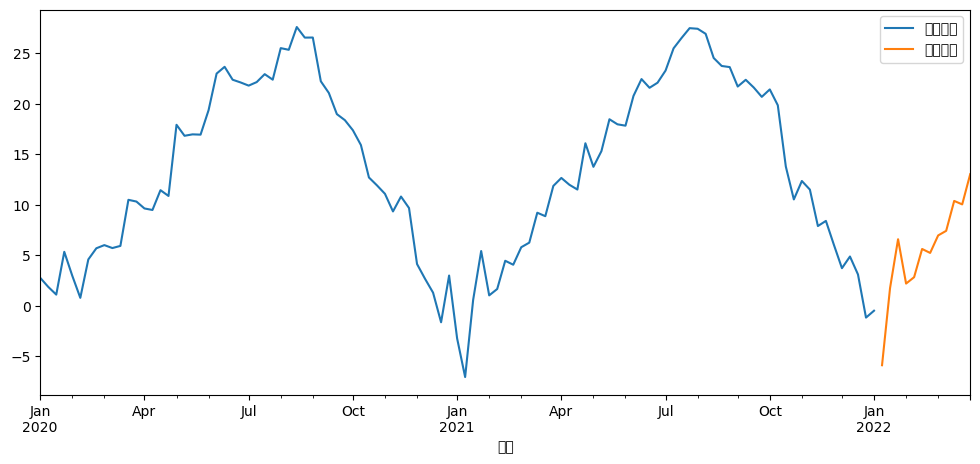

In [461]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings;warnings.filterwarnings('ignore')

# 3개월(12주) 예측

model_temp = SARIMAX(a.평균온도, order=(0,1,1), seasonal_order=(0,1,0,52))
result = model_temp.fit()
weather_week_future_temp = result.predict(start=len(a),end=(len(a)-1)+12,
                         typ = 'level').rename('평균온도')
a.평균온도.plot(figsize=(12,5),legend=True)
weather_week_future_temp.plot(legend=True)

In [463]:
weather_week_future_temp = pd.DataFrame(weather_week_future_temp)

In [464]:
weather_week_future_temp.to_csv('미래변수_온도.csv')

### 강수량

In [465]:
weather_week.iloc[:,1:2]

,일강수량
날짜,
2020-01-07,7.03
2020-01-14,0.73
2020-01-21,0.13
2020-01-28,3.92
2020-02-04,0.30
...,...
2021-12-07,0.23
2021-12-14,0.10
2021-12-21,0.51


In [466]:
# 강수량
b = weather_week.iloc[:,1:2]
train = b.iloc[:len(b)-29]
test = b.iloc[len(b)-29:]

In [47]:
auto_arima_model = auto_arima(train, start_p=1,start_q=1,
                             max_p=3, max_q=3,m=52,
                             start_P = 1, start_Q = 1, max_P=3, max_Q=3,
                             seasonal = True, d=1, D=1, trace=True,
                             error_action = 'ignore',
                             suppress_warning=True, stepwise=False)
auto_arima_model.summary()

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=139.672, Time=0.20 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=141.672, Time=0.27 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=143.672, Time=0.62 sec
 ARIMA(0,1,0)(0,1,3)[52]             : AIC=145.672, Time=1.33 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=141.672, Time=0.17 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=143.672, Time=0.25 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=145.672, Time=0.68 sec
 ARIMA(0,1,0)(1,1,3)[52]             : AIC=147.672, Time=1.46 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=143.672, Time=0.42 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=145.672, Time=0.62 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=147.672, Time=0.86 sec
 ARIMA(0,1,0)(2,1,3)[52]             : AIC=149.672, Time=1.78 sec
 ARIMA(0,1,0)(3,1,0)[52]             : AIC=145.672, Time=1.02 sec
 ARIMA(0,1,0)(3,1,1)[52]             : AIC=147.672, Time=1.47 sec
 ARIMA(0,1,0)(3,1,2)[52]             : AIC=149.672, Time=1.89 sec
 ARIMA(0,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   76
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 52)   Log Likelihood                 -62.398
Date:                             Fri, 25 Nov 2022   AIC                            128.796
Time:                                     19:48:30   BIC                            131.067
Sample:                                 01-07-2020   HQIC                           129.367
                                      - 06-15-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9502      0.234     -4.053      0.000      -1.410      -0.491
sigma2        12.0690      4.755      2.538      0.011       2.750      21.388
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):                 0.15
Prob(Q):                              0.43   Prob(JB):                         0.93
Heteroskedasticity (H):               0.50   Skew:                            -0.20
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='날짜'>

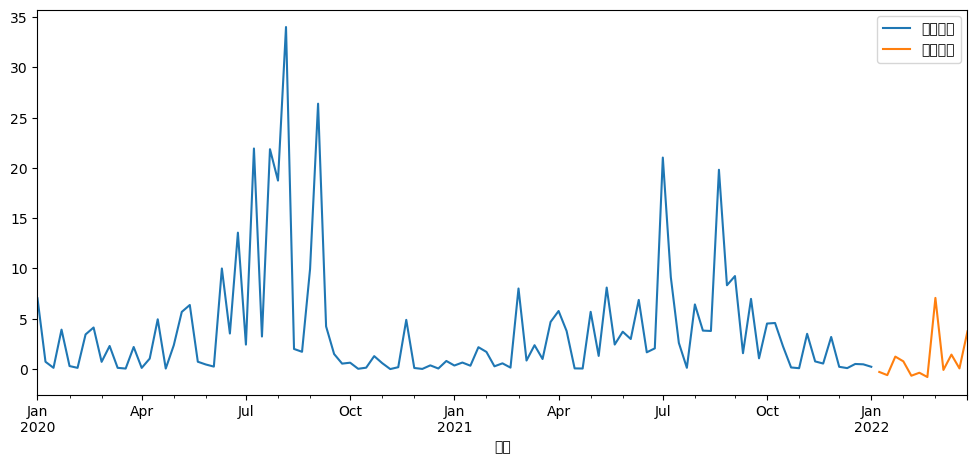

In [467]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings;warnings.filterwarnings('ignore')

# 3개월(12주) 예측

model_rain = SARIMAX(b.일강수량, order=(0,1,1), seasonal_order=(0,1,0,52))
result = model_rain.fit()
weather_week_future_rain = result.predict(start=len(a),end=(len(a)-1)+12,
                         typ = 'level').rename('일강수량')
b.일강수량.plot(figsize=(12,5),legend=True)
weather_week_future_rain.plot(legend=True)

In [468]:
weather_week_future_rain = pd.DataFrame(weather_week_future_rain)
weather_week_future_rain[weather_week_future_rain['일강수량']<0] = 0
weather_week_future_rain

,일강수량
2022-01-11,0.00
2022-01-18,0.00
2022-01-25,1.24
2022-02-01,0.77
2022-02-08,0.00
2022-02-15,0.00
2022-02-22,0.00
2022-03-01,7.08
2022-03-08,0.00
2022-03-15,1.44


In [469]:
weather_week_future_rain.to_csv('미래변수_강수량.csv')

### 습도

In [470]:
# 습도
c = weather_week.iloc[:,2:3]
train = c.iloc[:len(b)-29]
test = c.iloc[len(b)-29:]

In [54]:
auto_arima_model = auto_arima(train, start_p=1,start_q=1,
                             max_p=3, max_q=3,m=52,
                             start_P = 1, start_Q = 1, max_P=3, max_Q=3,
                             seasonal = True, d=1, D=1, trace=True,
                             error_action = 'ignore',
                             suppress_warning=True, stepwise=False)
auto_arima_model.summary()

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=173.792, Time=0.11 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=175.792, Time=0.62 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=inf, Time=4.89 sec
 ARIMA(0,1,0)(0,1,3)[52]             : AIC=179.792, Time=3.10 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=inf, Time=1.90 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=177.790, Time=2.71 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=179.791, Time=2.60 sec
 ARIMA(0,1,0)(1,1,3)[52]             : AIC=inf, Time=12.35 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=177.791, Time=1.74 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=179.791, Time=1.93 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=inf, Time=8.95 sec
 ARIMA(0,1,0)(2,1,3)[52]             : AIC=183.792, Time=4.42 sec
 ARIMA(0,1,0)(3,1,0)[52]             : AIC=inf, Time=9.22 sec
 ARIMA(0,1,0)(3,1,1)[52]             : AIC=inf, Time=15.99 sec
 ARIMA(0,1,0)(3,1,2)[52]             : AIC=inf, Time=7.82 sec
 ARIMA(0,1,1)(0,1,0)[52]            

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   76
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 52)   Log Likelihood                 -82.664
Date:                             Fri, 25 Nov 2022   AIC                            169.329
Time:                                     20:00:39   BIC                            171.600
Sample:                                 01-07-2020   HQIC                           169.900
                                      - 06-15-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8280      0.139     -5.957      0.000      -1.100      -0.556
sigma2        73.7041     23.539      3.131      0.002      27.568     119.841
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):                 0.09
Prob(Q):                              0.46   Prob(JB):                         0.96
Heteroskedasticity (H):               0.75   Skew:                            -0.02
Prob(H) (two-sided):                  0.70   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='날짜'>

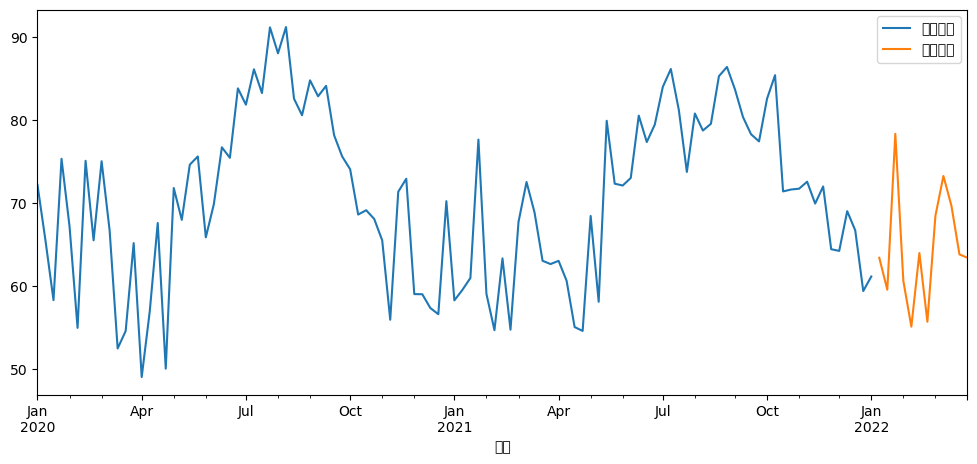

In [471]:
# 3개월(12주) 예측

model_humidity = SARIMAX(c.상대습도, order=(2,1,0), seasonal_order=(0,1,0,52))
result = model_humidity.fit()
weather_week_future_humidity = result.predict(start=len(a),end=(len(a)-1)+12,
                         typ = 'level').rename('상대습도')
c.상대습도.plot(figsize=(12,5),legend=True)
weather_week_future_humidity.plot(legend=True)

In [472]:
weather_week_future_humidity = pd.DataFrame(weather_week_future_humidity)
weather_week_future_humidity

,상대습도
2022-01-11,63.44
2022-01-18,59.60
2022-01-25,78.37
2022-02-01,60.66
2022-02-08,55.15
2022-02-15,64.01
2022-02-22,55.74
2022-03-01,68.48
2022-03-08,73.29
2022-03-15,69.70


In [473]:
weather_week_future_humidity.to_csv('미래변수_습도.csv')

### 적설량

In [474]:
# 적설량
d = weather_week.iloc[:,3:4]
train = d.iloc[:len(d)-29]
test = d.iloc[len(d)-29:]

In [60]:
auto_arima_model = auto_arima(train, start_p=1,start_q=1,
                             max_p=3, max_q=3,m=52,
                             start_P = 1, start_Q = 1, max_P=3, max_Q=3,
                             seasonal = True, d=1, D=1, trace=True,
                             error_action = 'ignore',
                             suppress_warning=True, stepwise=False)
auto_arima_model.summary()

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=12.211, Time=0.20 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=14.211, Time=0.38 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=16.211, Time=0.64 sec
 ARIMA(0,1,0)(0,1,3)[52]             : AIC=18.211, Time=1.46 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=14.211, Time=0.21 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=16.211, Time=0.32 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=18.211, Time=1.54 sec
 ARIMA(0,1,0)(1,1,3)[52]             : AIC=20.211, Time=1.79 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=16.211, Time=0.84 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=18.211, Time=0.91 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=20.211, Time=1.10 sec
 ARIMA(0,1,0)(2,1,3)[52]             : AIC=22.211, Time=2.22 sec
 ARIMA(0,1,0)(3,1,0)[52]             : AIC=18.211, Time=6.34 sec
 ARIMA(0,1,0)(3,1,1)[52]             : AIC=20.211, Time=1.66 sec
 ARIMA(0,1,0)(3,1,2)[52]             : AIC=22.211, Time=3.29 sec
 ARIMA(0,1,1)(0,1,0)[52] 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   76
Model:             SARIMAX(3, 1, 2)x(0, 1, [], 52)   Log Likelihood                   1.774
Date:                             Fri, 25 Nov 2022   AIC                              8.452
Time:                                     20:07:08   BIC                             15.265
Sample:                                 01-07-2020   HQIC                            10.166
                                      - 06-15-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9750      0.419     -2.328      0.020      -1.796      -0.154
ar.L2         -0.9357      0.283     -3.310      0.001      -1.490      -0.382
ar.L3         -0.7200      0.176     -4.080      0.000      -1.066      -0.374
ma.L1          1.5281      5.875      0.260      0.795      -9.986      13.042
ma.L2          0.9788      7.569      0.129      0.897     -13.857      15.814
sigma2         0.0362      0.269      0.134      0.893      -0.491       0.564
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 4.62
Prob(Q):                              0.71   Prob(JB):                         0.10
Heteroskedasticity (H):               0.01   Skew:                            -0.70
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='날짜'>

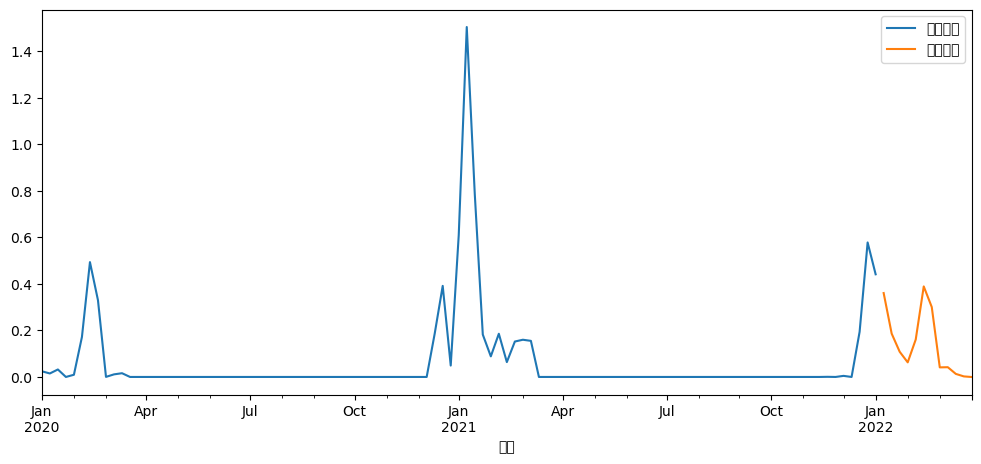

In [475]:
# 3개월(12주) 예측

model_snow = SARIMAX(d.최심적설, order=(3,0,1), seasonal_order=(1,1,0,52))
result = model_snow.fit()
weather_week_future_snow = result.predict(start=len(a),end=(len(a)-1)+12,
                         typ = 'level').rename('최심적설')
d.최심적설.plot(figsize=(12,5),legend=True)
weather_week_future_snow.plot(legend=True)

In [476]:
weather_week_future_snow = pd.DataFrame(weather_week_future_snow)
weather_week_future_snow[weather_week_future_snow['최심적설']<0]= 0
weather_week_future_snow

,최심적설
2022-01-11,0.36
2022-01-18,0.19
2022-01-25,0.11
2022-02-01,0.06
2022-02-08,0.16
2022-02-15,0.39
2022-02-22,0.30
2022-03-01,0.04
2022-03-08,0.04
2022-03-15,0.01


In [477]:
weather_week_future_snow.to_csv('미래변수_적설량.csv')

### 금리

In [478]:
# 금리
e = rate_week
train = e.iloc[:len(b)-29]
test = e.iloc[len(b)-29:]

In [75]:
auto_arima_model = auto_arima(train, start_p=1,start_q=1,
                             max_p=3, max_q=3,m=52,
                             start_P = 1, start_Q = 1, max_P=3, max_Q=3,
                             seasonal = True, d=1, D=1, trace=True,
                             error_action = 'ignore',
                             suppress_warning=True, stepwise=False)
auto_arima_model.summary()

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=-31.598, Time=0.14 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=-29.598, Time=1.36 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=-27.598, Time=2.58 sec
 ARIMA(0,1,0)(0,1,3)[52]             : AIC=-25.598, Time=1.59 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=-29.598, Time=0.25 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=-27.598, Time=0.36 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=-25.598, Time=1.28 sec
 ARIMA(0,1,0)(1,1,3)[52]             : AIC=-23.598, Time=1.78 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=-27.598, Time=0.70 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=-25.598, Time=1.10 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=-23.598, Time=4.31 sec
 ARIMA(0,1,0)(2,1,3)[52]             : AIC=-21.598, Time=2.14 sec
 ARIMA(0,1,0)(3,1,0)[52]             : AIC=-25.598, Time=1.64 sec
 ARIMA(0,1,0)(3,1,1)[52]             : AIC=-23.598, Time=2.26 sec
 ARIMA(0,1,0)(3,1,2)[52]             : AIC=-21.598, Time=2.55 sec
 ARIMA(0,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   76
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 52)   Log Likelihood                  16.799
Date:                            Fri, 25 Nov 2022   AIC                            -31.598
Time:                                    20:15:31   BIC                            -30.462
Sample:                                01-07-2020   HQIC                           -31.312
                                     - 06-15-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0136      0.001      9.175      0.000       0.011       0.016
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):               158.91
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                             3.46
Prob(H) (two-sided):                  0.07   Kurtosis:                        13.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

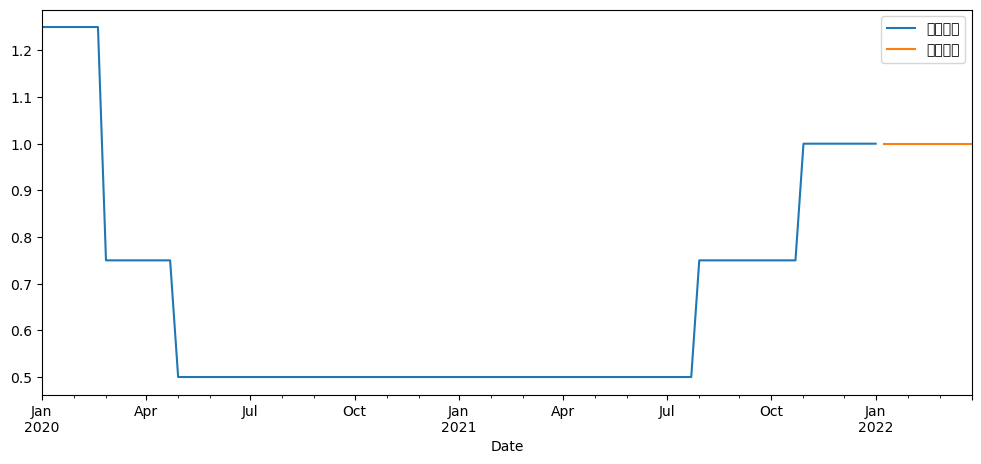

In [479]:
# 3개월(12주) 예측

model_rate = SARIMAX(e.기준금리, order=(0,1,0), seasonal_order=(0,1,0,52))
result = model_rate.fit()
weather_week_future_rate = result.predict(start=len(a),end=(len(a)-1)+12,
                         typ = 'level').rename('기준금리')
e.기준금리.plot(figsize=(12,5),legend=True)
weather_week_future_rate.plot(legend=True)

In [480]:
weather_week_future_rate = pd.DataFrame(weather_week_future_rate)
weather_week_future_rate

,기준금리
2022-01-11,1.00
2022-01-18,1.00
2022-01-25,1.00
2022-02-01,1.00
2022-02-08,1.00
2022-02-15,1.00
2022-02-22,1.00
2022-03-01,1.00
2022-03-08,1.00
2022-03-15,1.00


In [481]:
weather_week_future_rate.to_csv('미래변수_금리.csv')

### 착공면적

In [482]:
# 착공면적
f = construction_week_scaled_
train = f.iloc[:len(b)-29]
test = f.iloc[len(b)-29:]

In [78]:
auto_arima_model = auto_arima(train, start_p=1,start_q=1,
                             max_p=3, max_q=3,m=52,
                             start_P = 1, start_Q = 1, max_P=3, max_Q=3,
                             seasonal = True, d=1, D=1, trace=True,
                             error_action = 'ignore',
                             suppress_warning=True, stepwise=False)
auto_arima_model.summary()

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=-52.905, Time=0.25 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=-50.905, Time=0.70 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=-48.905, Time=0.79 sec
 ARIMA(0,1,0)(0,1,3)[52]             : AIC=-46.905, Time=2.38 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=-50.905, Time=0.28 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=-48.905, Time=0.57 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=-46.905, Time=2.72 sec
 ARIMA(0,1,0)(1,1,3)[52]             : AIC=-44.905, Time=2.09 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=-48.905, Time=0.69 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=-46.905, Time=1.41 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=-44.905, Time=2.13 sec
 ARIMA(0,1,0)(2,1,3)[52]             : AIC=-42.905, Time=2.75 sec
 ARIMA(0,1,0)(3,1,0)[52]             : AIC=-46.905, Time=2.01 sec
 ARIMA(0,1,0)(3,1,1)[52]             : AIC=-44.905, Time=6.60 sec
 ARIMA(0,1,0)(3,1,2)[52]             : AIC=-42.905, Time=5.18 sec
 ARIMA(0,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   76
Model:             SARIMAX(2, 1, 3)x(0, 1, [], 52)   Log Likelihood                  32.502
Date:                             Fri, 25 Nov 2022   AIC                            -53.005
Time:                                     20:23:09   BIC                            -46.192
Sample:                                 01-07-2020   HQIC                           -51.291
                                      - 06-15-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2177      0.238      5.114      0.000       0.751       1.684
ar.L2         -0.9046      0.148     -6.132      0.000      -1.194      -0.615
ma.L1         -1.4159      0.325     -4.356      0.000      -2.053      -0.779
ma.L2          1.1781      0.460      2.562      0.010       0.277       2.079
ma.L3         -0.4790      0.373     -1.283      0.200      -1.211       0.253
sigma2         0.0031      0.001      3.062      0.002       0.001       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):                 1.16
Prob(Q):                              0.52   Prob(JB):                         0.56
Heteroskedasticity (H):               0.18   Skew:                             0.03
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

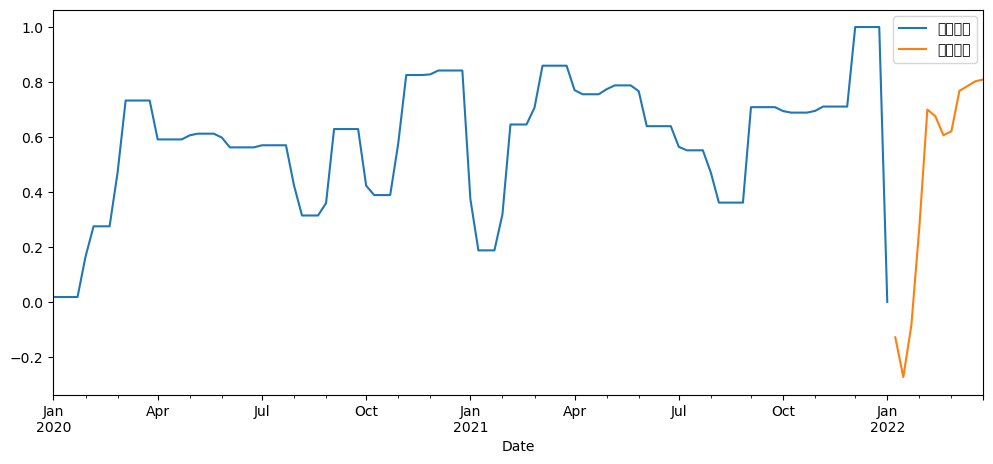

In [483]:
# 3개월(12주) 예측

model_area = SARIMAX(f.착공지수, order=(2,1,3), seasonal_order=(0,1,0,52))
result = model_area.fit()
weather_week_future_area = result.predict(start=len(a),end=(len(a)-1)+12,
                         typ = 'level').rename('착공지수')
f.착공지수.plot(figsize=(12,5),legend=True)
weather_week_future_area.plot(legend=True)

In [484]:
weather_week_future_area = pd.DataFrame(weather_week_future_area)
weather_week_future_area[weather_week_future_area['착공지수']<0] = 0

In [485]:
weather_week_future_area.to_csv('미래변수_착공면적.csv')

### 출하량

In [486]:
# 출하량
g = shipment_week
train = g.iloc[:len(b)-29]
test = g.iloc[len(b)-29:]

In [85]:
auto_arima_model = auto_arima(train, start_p=1,start_q=1,
                             max_p=3, max_q=3,m=52,
                             start_P = 1, start_Q = 1, max_P=3, max_Q=3,
                             seasonal = True, d=1, D=1, trace=True,
                             error_action = 'ignore',
                             suppress_warning=True, stepwise=False)
auto_arima_model.summary()

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=225.173, Time=0.13 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=227.170, Time=0.87 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=229.171, Time=1.10 sec
 ARIMA(0,1,0)(0,1,3)[52]             : AIC=231.171, Time=2.56 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=inf, Time=1.27 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=inf, Time=2.07 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=231.166, Time=6.54 sec
 ARIMA(0,1,0)(1,1,3)[52]             : AIC=233.171, Time=2.54 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=inf, Time=2.15 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=inf, Time=7.54 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=233.166, Time=7.66 sec
 ARIMA(0,1,0)(2,1,3)[52]             : AIC=235.171, Time=3.33 sec
 ARIMA(0,1,0)(3,1,0)[52]             : AIC=inf, Time=5.71 sec
 ARIMA(0,1,0)(3,1,1)[52]             : AIC=inf, Time=17.24 sec
 ARIMA(0,1,0)(3,1,2)[52]             : AIC=235.165, Time=19.21 sec
 ARIMA(0,1,1)(0,1,0)[52]        

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   76
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 52)   Log Likelihood                -111.586
Date:                            Fri, 25 Nov 2022   AIC                            225.173
Time:                                    20:34:21   BIC                            226.308
Sample:                                01-07-2020   HQIC                           225.458
                                     - 06-15-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       958.3553    158.153      6.060      0.000     648.382    1268.329
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                18.60
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                            -0.73
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

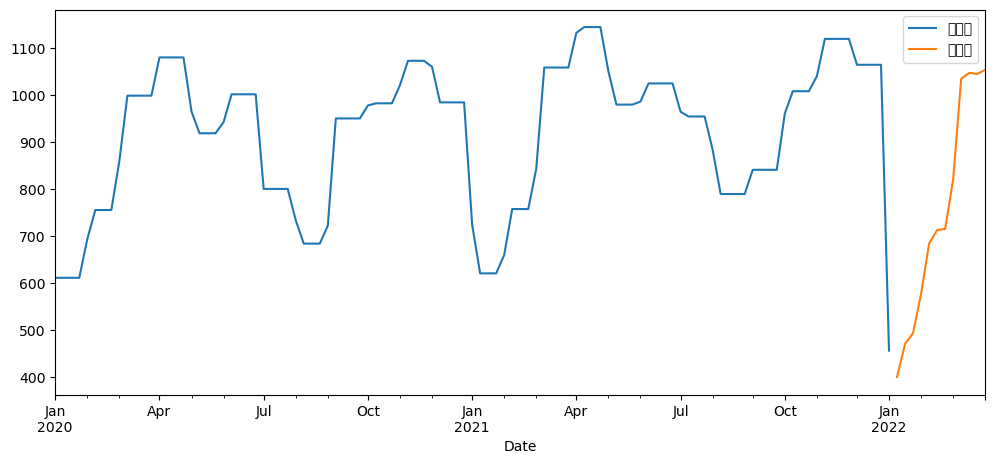

In [487]:
# 3개월(12주) 예측

model_out = SARIMAX(g.출하량, order=(2,1,2), seasonal_order=(0,1,0,52))
result = model_out.fit()
weather_week_future_out = result.predict(start=len(a),end=(len(a)-1)+12,
                         typ = 'level').rename('출하량')
g.출하량.plot(figsize=(12,5),legend=True)
weather_week_future_out.plot(legend=True)

In [488]:
weather_week_future_out = pd.DataFrame(weather_week_future_out)
weather_week_future_out

,출하량
2022-01-11,399.63
2022-01-18,470.31
2022-01-25,492.97
2022-02-01,576.46
2022-02-08,683.43
2022-02-15,712.01
2022-02-22,714.50
2022-03-01,819.34
2022-03-08,1033.46
2022-03-15,1046.22


In [489]:
weather_week_future_out.to_csv('미래변수_출하량.csv')

### 예상중량

In [490]:
data20_21_detail_week['제품명'].unique()

array(['PEMA-HR1000', 'PEMA-PR1000', 'PEMA-SR2000', 'PEMA-SR3000F',
       'CSA4000', 'CSA5000', 'PEMA-500FR', 'PEMA-580FX', 'PEMA-CR1000',
       'PEMA-CSA5000', 'PEMA-HR1500', 'PEMA-SN400', 'PEMA-SR2000A', 'AE',
       'PEMA-PCM2000', 'PEMA-PR2000', 'SRE-110', 'PEMA-PCM2000B',
       'PR1000', 'PEMA-PCR3000E', 'PEMA-SR5000F', 'PEMA-PCR3000N',
       'PEMA-SP1000', 'SRE-200', 'PEMA-SPR', 'ARE-580FX', 'PEMA-HR1000S'],
      dtype=object)

In [491]:
data20_21_detail_week.iloc[:,2:3]

,예상중량
2020-01-07,342341
2020-01-14,252952
2020-01-21,555156
2020-01-28,310633
2020-02-04,507763
...,...
2021-12-07,0
2021-12-14,8606
2021-12-21,0
2021-12-28,9128


In [492]:
# 예상중량
h = data20_21_detail_week.iloc[:,2:3]
train = h.iloc[:len(h)-29]
test = h.iloc[len(h)-29:]

In [493]:
test

,예상중량
2021-06-22,0
2021-06-29,0
2021-07-06,0
2021-07-13,0
2021-07-20,0
2021-07-27,0
2021-08-03,0
2021-08-10,0
2021-08-17,11666
2021-08-24,0


In [137]:
auto_arima_model = auto_arima(train, start_p=1,start_q=1,
                             max_p=3, max_q=3,m=52,
                             start_P = 1, start_Q = 1, max_P=3, max_Q=3,
                             seasonal = True, d=1, D=1, trace=True,
                             error_action = 'ignore',
                             suppress_warning=True, stepwise=False)
auto_arima_model.summary()

 ARIMA(0,1,0)(0,1,0)[52]             : AIC=139.672, Time=0.10 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=141.672, Time=0.23 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=143.672, Time=0.58 sec
 ARIMA(0,1,0)(0,1,3)[52]             : AIC=145.672, Time=1.26 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=141.672, Time=0.16 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=143.672, Time=0.24 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=145.672, Time=0.67 sec
 ARIMA(0,1,0)(1,1,3)[52]             : AIC=147.672, Time=1.33 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=143.672, Time=0.46 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=145.672, Time=0.63 sec
 ARIMA(0,1,0)(2,1,2)[52]             : AIC=147.672, Time=1.13 sec
 ARIMA(0,1,0)(2,1,3)[52]             : AIC=149.672, Time=2.40 sec
 ARIMA(0,1,0)(3,1,0)[52]             : AIC=145.672, Time=1.39 sec
 ARIMA(0,1,0)(3,1,1)[52]             : AIC=147.672, Time=1.88 sec
 ARIMA(0,1,0)(3,1,2)[52]             : AIC=149.672, Time=1.86 sec
 ARIMA(0,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   76
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 52)   Log Likelihood                 -62.398
Date:                             Sat, 26 Nov 2022   AIC                            128.796
Time:                                     00:01:50   BIC                            131.067
Sample:                                 01-07-2020   HQIC                           129.367
                                      - 06-15-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9502      0.234     -4.053      0.000      -1.410      -0.491
sigma2        12.0690      4.755      2.538      0.011       2.750      21.388
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):                 0.15
Prob(Q):                              0.43   Prob(JB):                         0.93
Heteroskedasticity (H):               0.50   Skew:                            -0.20
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [494]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings;warnings.filterwarnings('ignore')

In [495]:
li = []
for i in data20_21_detail_week['제품명'].unique():
    h = data20_21_detail_week[data20_21_detail_week['제품명']==i]    
    
    
    model_pred_weight = SARIMAX(h.예상중량, order=(2,1,2), seasonal_order=(0,1,0,52))
    result = model_pred_weight.fit()
    weather_week_future_pred_weight = result.predict(start=len(h),end=(len(h)-1)+12,
                             typ = 'level').rename('예상중량')
    weather_week_future_pred_weight = pd.DataFrame(weather_week_future_pred_weight)
    weather_week_future_pred_weight['제품명'] = i
    li.append(weather_week_future_pred_weight)

In [496]:
weather_week_future_pred_weight = pd.concat(li)
# weather_week_future_pred_weight[weather_week_future_pred_weight['예상중량']<0]['예상중량'] = 0
weather_week_future_pred_weight['예상중량'].loc[weather_week_future_pred_weight['예상중량'] < 0] = 0
weather_week_future_pred_weight


,예상중량,제품명
2022-01-11,169806.92,PEMA-HR1000
2022-01-18,283976.93,PEMA-HR1000
2022-01-25,421311.42,PEMA-HR1000
2022-02-01,187202.68,PEMA-HR1000
2022-02-08,468873.14,PEMA-HR1000
...,...,...
2022-03-01,136.26,PEMA-HR1000S
2022-03-08,136.29,PEMA-HR1000S
2022-03-15,136.38,PEMA-HR1000S
2022-03-22,136.34,PEMA-HR1000S


In [497]:
weather_week_future_pred_weight[weather_week_future_pred_weight['예상중량']==0]

,예상중량,제품명
2022-01-18,0.00,PEMA-SR2000
2022-03-08,0.00,PEMA-SR2000
2022-02-01,0.00,CSA4000
2022-02-08,0.00,CSA4000
2022-01-11,0.00,PEMA-500FR
...,...,...
2022-03-01,0.00,ARE-580FX
2022-03-08,0.00,ARE-580FX
2022-03-15,0.00,ARE-580FX
2022-03-22,0.00,ARE-580FX


In [498]:
weather_week_future_pred_weight.to_csv('미래변수_예상중량.csv')

## 학습 및 평가

In [499]:
dataset_detail_week = pd.read_csv('학습용 데이터셋_2년.csv',index_col=0)

In [500]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [501]:
# 모델 생성
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
lg_reg = LogisticRegression()
lr_clf = LinearRegression()
lgbm_reg = LGBMRegressor()
ridge_reg = Ridge()
lasso_reg = Lasso()


# 피쳐, 타겟 지정
x_feature = dataset_detail_week.drop(['수주량'],axis=1)
y_label = dataset_detail_week['수주량'].values

x_train,x_test,y_train,y_test = train_test_split(x_feature,y_label,test_size=0.2, random_state=10)

In [502]:
dt_reg.fit(x_train,y_train)
rf_reg.fit(x_train,y_train)
lg_reg.fit(x_train,y_train)
lr_clf.fit(x_train,y_train)
lgbm_reg.fit(x_train,y_train)
ridge_reg.fit(x_train,y_train)
lasso_reg.fit(x_train,y_train)

dt_pred=dt_reg.predict(x_test)
rf_pred=rf_reg.predict(x_test)
lg_pred=lg_reg.predict(x_test)
lr_pred=lr_clf.predict(x_test)
lgbm_pred=lgbm_reg.predict(x_test)
ridge_pred=ridge_reg.predict(x_test)
lasso_pred=lasso_reg.predict(x_test)

dt_mse = mean_squared_error(y_test,dt_pred)
dt_mae = mean_absolute_error(y_test,dt_pred)
dt_r2 = r2_score(y_test,dt_pred)
print('---DT---')
print('MSE : ',np.sqrt(dt_mse))
print('MAE : ',dt_mae)
print('R2 : ',dt_r2)

rf_mse = mean_squared_error(y_test,rf_pred)
rf_mae = mean_absolute_error(y_test,rf_pred)
rf_r2 = r2_score(y_test,rf_pred)
print('---RF---')
print('MSE : ',np.sqrt(rf_mse))
print('MAE : ',rf_mae)
print('R2 : ',rf_r2)

lg_mse = mean_squared_error(y_test,lg_pred)
lg_mae = mean_absolute_error(y_test,lg_pred)
lg_r2 = r2_score(y_test,lg_pred)
print('---LG---')
print('MSE : ',np.sqrt(lg_mse))
print('MAE : ',lg_mae)
print('R2 : ',lg_r2)

lr_mse = mean_squared_error(y_test,lr_pred)
lr_mae = mean_absolute_error(y_test,lr_pred)
lr_r2 = r2_score(y_test,lr_pred)
print('---LR---')
print('MSE : ',np.sqrt(lr_mse))
print('MAE : ',lr_mae)
print('R2 : ',lr_r2)

lgbm_mse = mean_squared_error(y_test,lgbm_pred)
lgbm_mae = mean_absolute_error(y_test,lgbm_pred)
lgbm_r2 = r2_score(y_test,lgbm_pred)
print('---LGBM---')
print('MSE : ',np.sqrt(lgbm_mse))
print('MAE : ',lgbm_mae)
print('R2 : ',lgbm_r2)

ridge_mse = mean_squared_error(y_test,ridge_pred)
ridge_mae = mean_absolute_error(y_test,ridge_pred)
ridge_r2 = r2_score(y_test,ridge_pred)
print('---Ridge---')
print('MSE : ',np.sqrt(ridge_mse))
print('MAE : ',ridge_mae)
print('R2 : ',ridge_r2)

lasso_mse = mean_squared_error(y_test,lasso_pred)
lasso_mae = mean_absolute_error(y_test,lasso_pred)
lasso_r2 = r2_score(y_test,lasso_pred)
print('---Lasso---')
print('MSE : ',np.sqrt(lasso_mse))
print('MAE : ',lasso_mae)
print('R2 : ',lasso_r2)

---DT---
MSE :  32847.815434758806
MAE :  11429.10052910053
R2 :  0.9203915706109216
---RF---
MSE :  23460.234561963476
MAE :  8261.063668430334
R2 :  0.9593920774524257
---LG---
MSE :  111088.33098860661
MAE :  48981.69312169312
R2 :  0.08949369842368116
---LR---
MSE :  20763.898037617066
MAE :  8524.464164262936
R2 :  0.9681899869523544
---LGBM---
MSE :  22050.92793738045
MAE :  8404.92343311789
R2 :  0.9641243472235554
---Ridge---
MSE :  20771.16685457995
MAE :  8468.01213347189
R2 :  0.9681677115940567
---Lasso---
MSE :  20761.61108393816
MAE :  8519.300580302792
R2 :  0.9681969937311362


In [503]:
y_test

array([     0.,  10000.,   7000.,  35000.,      0.,  44000.,  10000.,
        46000., 558000., 364000., 120000.,      0.,      0.,   4000.,
            0.,  15000., 483000.,  45000.,      0.,  30000.,  72570.,
            0., 115000.,      0., 186000.,      0.,  20000., 491000.,
            0.,  10000.,  55000.,  60000.,  45000.,      0., 517000.,
       494000.,  35000.,  10000.,  75000.,  46000.,  90000.,  10000.,
        10000.,   7000., 100000.,  82000.,  10000.,      0., 821550.,
        41000.,  13000., 185000.,  12000.,      0.,      0.,  50000.,
        95000.,  22000.,      0.,  87000., 105000.,  43000.,  86000.,
        17000.,  20000.,      0.,  10000.,   5000.,  18000.,  70000.,
            0.,      0.,      0., 224000.,      0.,  28000.,      0.,
       170000.,   8000., 135000.,      0.,      0.,  48000., 264000.,
       285000., 461000.,   6000.,  44000.,  35000.,  46000.,  80000.,
        20000.,      0.,  82000.,  20000.,  20000., 165000.,      0.,
        20000.,     

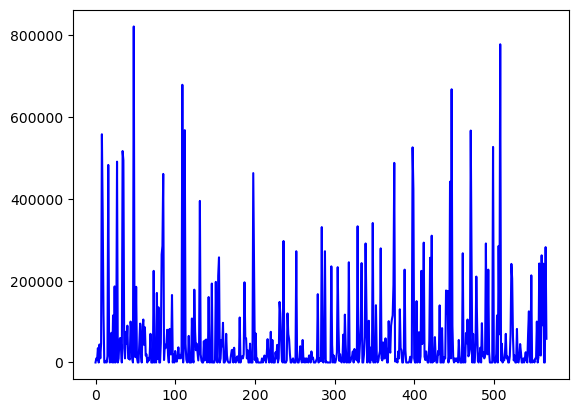

In [504]:
import matplotlib.pyplot as plt
plt.plot(range(len(y_test)),y_test,'b')

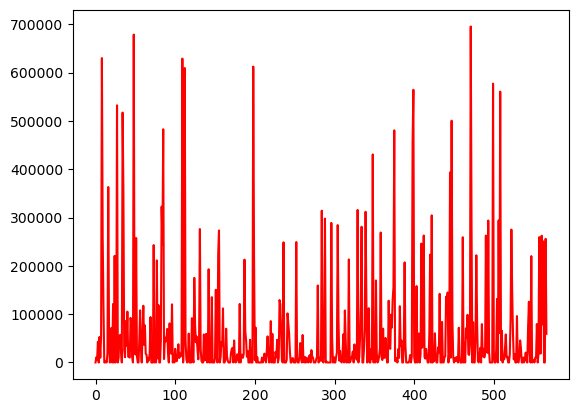

In [505]:
plt.plot(range(len(y_test)),rf_pred,'r')

## 예측

In [506]:
# 예측 데이터셋 불러오기
x_test.head()

,평균온도,일강수량,상대습도,최심적설,기준금리,착공지수,출하량,예상중량,AE,ARE-580FX,...,PEMA-SN400,PEMA-SP1000,PEMA-SPR,PEMA-SR2000,PEMA-SR2000A,PEMA-SR3000F,PEMA-SR5000F,PR1000,SRE-110,SRE-200
2021-03-09,6.23,0.85,72.57,0.16,0.50,0.86,1057.68,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-07-20,26.50,2.60,81.22,0.00,0.50,0.55,953.58,10747,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-11-30,6.01,3.20,64.47,0.00,1.00,0.71,1118.60,6386,0,0,...,0,1,0,0,0,0,0,0,0,0
2020-10-27,11.90,1.29,68.12,0.00,0.50,0.39,981.58,39842,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-10,5.70,2.30,66.73,0.01,0.75,0.73,997.84,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [507]:
weather_week_future_temp = pd.read_csv('미래변수_온도.csv',index_col=0)
weather_week_future_rain =  pd.read_csv('미래변수_강수량.csv',index_col=0)
weather_week_future_humidity =  pd.read_csv('미래변수_습도.csv',index_col=0)
weather_week_future_snow =  pd.read_csv('미래변수_적설량.csv',index_col=0)
weather_week_future_rate =  pd.read_csv('미래변수_금리.csv',index_col=0)
weather_week_future_area =  pd.read_csv('미래변수_착공면적.csv',index_col=0)
weather_week_future_out =  pd.read_csv('미래변수_출하량.csv',index_col=0)
weather_week_future_pred_weight =  pd.read_csv('미래변수_예상중량.csv',index_col=0)

In [508]:
dataset_detail_week_pred = weather_week_future_temp.join([weather_week_future_rain,weather_week_future_humidity,weather_week_future_snow,
                               weather_week_future_rate,weather_week_future_area,weather_week_future_out,weather_week_future_pred_weight])
dataset_detail_week_pred = pd.concat([dataset_detail_week_pred, pd.get_dummies(dataset_detail_week_pred['제품명'])],axis=1).drop(columns='제품명',axis=1)
dataset_detail_week_pred

,평균온도,일강수량,상대습도,최심적설,기준금리,착공지수,출하량,예상중량,AE,ARE-580FX,...,PEMA-SN400,PEMA-SP1000,PEMA-SPR,PEMA-SR2000,PEMA-SR2000A,PEMA-SR3000F,PEMA-SR5000F,PR1000,SRE-110,SRE-200
2022-01-11,-5.90,0.00,63.44,0.36,1.00,0.00,399.63,169806.92,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-11,-5.90,0.00,63.44,0.36,1.00,0.00,399.63,69789.92,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-11,-5.90,0.00,63.44,0.36,1.00,0.00,399.63,6046.91,0,0,...,0,0,0,1,0,0,0,0,0,0
2022-01-11,-5.90,0.00,63.44,0.36,1.00,0.00,399.63,9876.64,0,0,...,0,0,0,0,0,1,0,0,0,0
2022-01-11,-5.90,0.00,63.44,0.36,1.00,0.00,399.63,4710.39,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-29,13.01,3.75,63.44,0.00,1.00,0.81,1052.84,7194.68,0,0,...,0,1,0,0,0,0,0,0,0,0
2022-03-29,13.01,3.75,63.44,0.00,1.00,0.81,1052.84,0.00,0,0,...,0,0,0,0,0,0,0,0,0,1
2022-03-29,13.01,3.75,63.44,0.00,1.00,0.81,1052.84,46.30,0,0,...,0,0,1,0,0,0,0,0,0,0
2022-03-29,13.01,3.75,63.44,0.00,1.00,0.81,1052.84,0.00,0,1,...,0,0,0,0,0,0,0,0,0,0


In [509]:
dataset_detail_week_pred.columns[8:]

Index(['AE', 'ARE-580FX', 'CSA4000', 'CSA5000', 'PEMA-500FR', 'PEMA-580FX',
       'PEMA-CR1000', 'PEMA-CSA5000', 'PEMA-HR1000', 'PEMA-HR1000S',
       'PEMA-HR1500', 'PEMA-PCM2000', 'PEMA-PCM2000B', 'PEMA-PCR3000E',
       'PEMA-PCR3000N', 'PEMA-PR1000', 'PEMA-PR2000', 'PEMA-SN400',
       'PEMA-SP1000', 'PEMA-SPR', 'PEMA-SR2000', 'PEMA-SR2000A',
       'PEMA-SR3000F', 'PEMA-SR5000F', 'PR1000', 'SRE-110', 'SRE-200'],
      dtype='object')

In [510]:
dataset_detail_week.columns[9:]

Index(['AE', 'ARE-580FX', 'CSA4000', 'CSA5000', 'PEMA-500FR', 'PEMA-580FX',
       'PEMA-CR1000', 'PEMA-CSA5000', 'PEMA-HR1000', 'PEMA-HR1000S',
       'PEMA-HR1500', 'PEMA-PCM2000', 'PEMA-PCM2000B', 'PEMA-PCR3000E',
       'PEMA-PCR3000N', 'PEMA-PR1000', 'PEMA-PR2000', 'PEMA-SN400',
       'PEMA-SP1000', 'PEMA-SPR', 'PEMA-SR2000', 'PEMA-SR2000A',
       'PEMA-SR3000F', 'PEMA-SR5000F', 'PR1000', 'SRE-110', 'SRE-200'],
      dtype='object')

In [511]:
dataset_detail_week_pred

,평균온도,일강수량,상대습도,최심적설,기준금리,착공지수,출하량,예상중량,AE,ARE-580FX,...,PEMA-SN400,PEMA-SP1000,PEMA-SPR,PEMA-SR2000,PEMA-SR2000A,PEMA-SR3000F,PEMA-SR5000F,PR1000,SRE-110,SRE-200
2022-01-11,-5.90,0.00,63.44,0.36,1.00,0.00,399.63,169806.92,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-11,-5.90,0.00,63.44,0.36,1.00,0.00,399.63,69789.92,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-11,-5.90,0.00,63.44,0.36,1.00,0.00,399.63,6046.91,0,0,...,0,0,0,1,0,0,0,0,0,0
2022-01-11,-5.90,0.00,63.44,0.36,1.00,0.00,399.63,9876.64,0,0,...,0,0,0,0,0,1,0,0,0,0
2022-01-11,-5.90,0.00,63.44,0.36,1.00,0.00,399.63,4710.39,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-29,13.01,3.75,63.44,0.00,1.00,0.81,1052.84,7194.68,0,0,...,0,1,0,0,0,0,0,0,0,0
2022-03-29,13.01,3.75,63.44,0.00,1.00,0.81,1052.84,0.00,0,0,...,0,0,0,0,0,0,0,0,0,1
2022-03-29,13.01,3.75,63.44,0.00,1.00,0.81,1052.84,46.30,0,0,...,0,0,1,0,0,0,0,0,0,0
2022-03-29,13.01,3.75,63.44,0.00,1.00,0.81,1052.84,0.00,0,1,...,0,0,0,0,0,0,0,0,0,0


In [512]:
real_pred=rf_reg.predict(dataset_detail_week_pred)
real_pred = pd.DataFrame(real_pred,columns=['수주량']).set_index(dataset_detail_week_pred.index)
real_pred[real_pred['수주량']<0] = 0
real_pred = pd.concat([real_pred,dataset_detail_week_pred],axis=1)
real_pred.head(50)

,수주량,평균온도,일강수량,상대습도,최심적설,기준금리,착공지수,출하량,예상중량,AE,...,PEMA-SN400,PEMA-SP1000,PEMA-SPR,PEMA-SR2000,PEMA-SR2000A,PEMA-SR3000F,PEMA-SR5000F,PR1000,SRE-110,SRE-200
2022-01-11,196845.40,-5.90,0.00,63.44,0.36,1.00,0.00,399.63,169806.92,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-11,76155.70,-5.90,0.00,63.44,0.36,1.00,0.00,399.63,69789.92,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-11,6416.00,-5.90,0.00,63.44,0.36,1.00,0.00,399.63,6046.91,0,...,0,0,0,1,0,0,0,0,0,0
2022-01-11,10120.00,-5.90,0.00,63.44,0.36,1.00,0.00,399.63,9876.64,0,...,0,0,0,0,0,1,0,0,0,0
2022-01-11,5490.00,-5.90,0.00,63.44,0.36,1.00,0.00,399.63,4710.39,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-11,80579.90,-5.90,0.00,63.44,0.36,1.00,0.00,399.63,74371.96,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-11,0.00,-5.90,0.00,63.44,0.36,1.00,0.00,399.63,0.00,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-11,0.00,-5.90,0.00,63.44,0.36,1.00,0.00,399.63,0.00,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-11,6000.00,-5.90,0.00,63.44,0.36,1.00,0.00,399.63,5394.58,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-11,0.00,-5.90,0.00,63.44,0.36,1.00,0.00,399.63,444.17,0,...,0,0,0,0,0,0,0,0,0,0


In [513]:
real_pred.to_csv('3개월 예측 데이터셋.csv')

In [514]:
real_pred[real_pred['PEMA-PR2000']==1]

,수주량,평균온도,일강수량,상대습도,최심적설,기준금리,착공지수,출하량,예상중량,AE,...,PEMA-SN400,PEMA-SP1000,PEMA-SPR,PEMA-SR2000,PEMA-SR2000A,PEMA-SR3000F,PEMA-SR5000F,PR1000,SRE-110,SRE-200
2022-01-11,70.00,-5.90,0.00,63.44,0.36,1.00,0.00,399.63,0.00,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-18,57480.00,1.74,0.00,59.60,0.19,1.00,0.00,470.31,51892.39,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-25,70.00,6.57,1.24,78.37,0.11,1.00,0.00,492.97,0.00,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-01,29484.00,2.18,0.77,60.66,0.06,1.00,0.27,576.46,28741.92,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-08,75031.40,2.81,0.00,55.15,0.16,1.00,0.70,683.43,71078.57,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-15,70.00,5.61,0.00,64.01,0.39,1.00,0.68,712.01,0.00,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-22,26546.00,5.21,0.00,55.74,0.30,1.00,0.61,714.50,23519.99,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-01,41160.00,6.95,7.08,68.48,0.04,1.00,0.62,819.34,42850.95,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-08,62205.70,7.40,0.00,73.29,0.04,1.00,0.77,1033.46,60788.03,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-15,24500.00,10.36,1.44,69.70,0.01,1.00,0.79,1046.22,24704.49,0,...,0,0,0,0,0,0,0,0,0,0


In [515]:
real_pred = pd.read_csv('3개월 예측 데이터셋.csv',index_col=0)

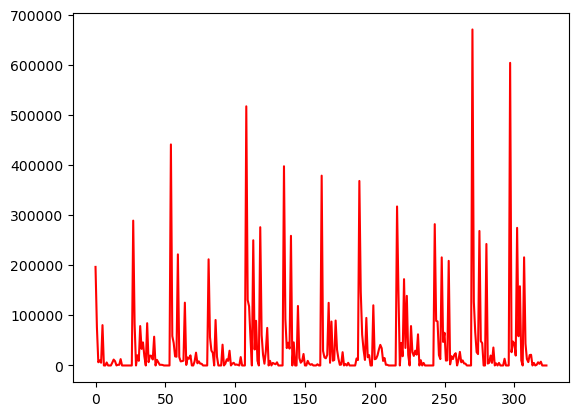

In [516]:
import matplotlib.pyplot as plt
plt.plot(range(len(real_pred)),real_pred['수주량'],'r')

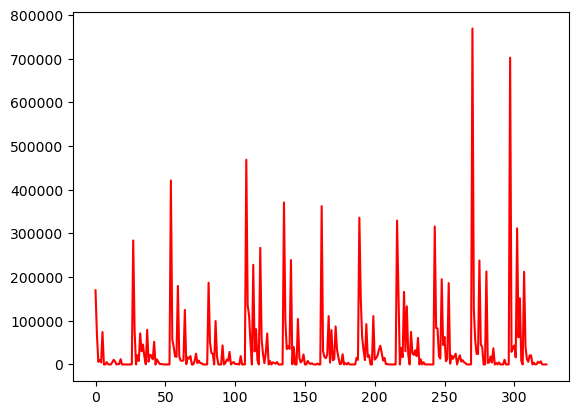

In [517]:
plt.plot(range(len(real_pred)),real_pred['예상중량'],'r')

In [518]:
mse = mean_squared_error(real_pred['수주량'],real_pred['예상중량'])
mae = mean_absolute_error(real_pred['수주량'],real_pred['예상중량'])
r2 = r2_score(real_pred['수주량'],real_pred['예상중량'])

print(np.sqrt(mse))
print(mae)
print(r2)

10553.969810546296
3395.8694028770624
0.9859270874675997


# 

# 월 단위 데이터셋 생성 (사용하지 않음)

## 수주량

In [478]:
# 월 단위 수주량 합계 데이터셋
data20_21_total_month = data20_21.copy()
data20_21_total_month = data20_21_total_month.pivot_table('수주량',index=['수주월'], aggfunc='sum')
data20_21_total_month

,수주량
수주월,
2020-01,4808400
2020-02,6317320
2020-03,7712350
2020-04,7157310
2020-05,7712350
2020-06,5784210
2020-07,6645350
2020-08,6182310
2020-09,7566350


In [479]:
# 월 단위 (거래처별, 품목별) 수주량  합계 데이터셋
data20_21_detail_month = data20_21.copy()
data20_21_detail_month = data20_21_detail_month.pivot_table('수주량',index=['수주월','거래처코드','제품명'], aggfunc='sum')
data20_21_detail_month = data20_21_detail_month.reset_index()
data20_21_detail_month = data20_21_detail_month.set_index('수주월')
data20_21_detail_month

,거래처코드,제품명,수주량
수주월,,,
2020-01,2001102,AE,3000
2020-01,2001102,CSA5000,23000
2020-01,2001102,PEMA-HR1000,7000
2020-01,2001102,PEMA-HR1500,4000
2020-01,2001102,PEMA-PR1000,20000
...,...,...,...
2021-12,2007800,PEMA-HR1000,10000
2021-12,2007800,PEMA-HR1500,30000
2021-12,2007800,PEMA-PCM2000,5000


## 날씨

In [480]:
# 월 단위 날씨
weather_month = weather.copy()
weather_month['년월'] = weather_month['날짜'].apply(yearmonth)
# weather['날짜'] = pd.to_datetime(weather['날짜'])

weather_month = weather_month.pivot_table(['평균온도','일강수량','상대습도','최심적설'],index='년월',aggfunc='mean')
weather_month.head(3)

,상대습도,일강수량,최심적설,평균온도
년월,,,,
2020-01,68,3,0,3
2020-02,67,2,0,4
2020-03,61,1,0,8


## 착공면적

In [481]:
construction_month = construction.copy()
construction_month = construction_month.set_index('Month')
construction_month.head(3)

,연면적별
Month,
2020-01,6200509
2020-02,7743793
2020-03,11972937


## 금리

In [482]:
rate_month = rate.copy().set_index('index')
rate_month.head(3)

,기준금리
index,
2020-01,1
2020-02,1
2020-03,1


## 데이터셋

In [483]:
dataset_total_month = weather_month.join([rate_month,construction_month,data20_21_total_month])
dataset_total_month

,상대습도,일강수량,최심적설,평균온도,기준금리,연면적별,수주량
년월,,,,,,,
2020-01,68,3,0,3,1,6200509,4808400
2020-02,67,2,0,4,1,7743793,6317320
2020-03,61,1,0,8,1,11972937,7712350
2020-04,56,1,0,11,1,10481354,7157310
2020-05,73,4,0,18,0,10999316,7712350
2020-06,76,6,0,23,0,10255271,5784210
2020-07,86,13,0,22,0,10658885,6645350
2020-08,85,13,0,27,0,8595586,6182310
2020-09,80,8,0,20,0,10775873,7566350


## 상세 데이터셋

In [484]:
dataset_detail_month = weather_month.join([rate_month,construction_month,data20_21_detail_month])
dataset_detail_month

,상대습도,일강수량,최심적설,평균온도,기준금리,연면적별,거래처코드,제품명,수주량
2020-01,68,3,0,3,1,6200509,2001102,AE,3000
2020-01,68,3,0,3,1,6200509,2001102,CSA5000,23000
2020-01,68,3,0,3,1,6200509,2001102,PEMA-HR1000,7000
2020-01,68,3,0,3,1,6200509,2001102,PEMA-HR1500,4000
2020-01,68,3,0,3,1,6200509,2001102,PEMA-PR1000,20000
...,...,...,...,...,...,...,...,...,...
2021-12,65,0,0,2,1,14132721,2007800,PEMA-HR1000,10000
2021-12,65,0,0,2,1,14132721,2007800,PEMA-HR1500,30000
2021-12,65,0,0,2,1,14132721,2007800,PEMA-PCM2000,5000
2021-12,65,0,0,2,1,14132721,2007800,PEMA-SR2000,36000


In [485]:
dataset_detail_month[(dataset_detail_month['거래처코드']==2001102)&(dataset_detail_month['제품명']=='AE')]

,상대습도,일강수량,최심적설,평균온도,기준금리,연면적별,거래처코드,제품명,수주량
2020-01,68,3,0,3,1,6200509,2001102,AE,3000
2020-03,61,1,0,8,1,11972937,2001102,AE,3000
2020-05,73,4,0,18,0,10999316,2001102,AE,3000
2020-07,86,13,0,22,0,10658885,2001102,AE,3000
2020-09,80,8,0,20,0,10775873,2001102,AE,3000
2020-11,66,1,0,9,0,12312253,2001102,AE,3000
2021-01,64,1,1,-1,0,7570978,2001102,AE,3000
2021-03,68,4,0,9,0,12996528,2001102,AE,3000
2021-05,71,4,0,17,0,12417941,2001102,AE,3000
2021-07,81,8,0,26,0,10510350,2001102,AE,3000


In [486]:
for i in dataset_detail['거래처코드'].unique():
    for j in dataset_detail[dataset_detail['거래처코드']==i]['제품명'].unique():
        data = dataset_detail[(dataset_detail['거래처코드']==i)&(dataset_detail['제품명']==j)]

KeyError: '거래처코드'

In [ ]:
from pmdarima import auto_arima

auto_arima_model = auto_arima(train, start_p=1,start_q=1,
                             max_p=5, max_q=3,m=12,
                             start_P = 1, start_Q = 1, max_P=3, max_Q=3,
                             seasonal = True, d=1, D=1, trace=True,
                             error_action = 'ignore',
                             suppress_warning=True, stepwise=False)
auto_arima_model.summary()